In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
nltk.download('vader_lexicon')
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.cluster import KMeans
from operator import itemgetter
import random

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/menis/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#!python -m pip install wordcloud


In [2]:
data = pd.read_json("clustered.json")


In [ ]:
#vader thresholds in literature
#positive sentiment: compound score >= 0.05
#neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
#negative sentiment: compound score <= -0.05

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()
text = data["text"].tolist()
scores = list()
positive = list()
negative = list()
neut = list()
for t in text:
    scores.append(vader.polarity_scores(t)['compound'])
    positive.append(vader.polarity_scores(t)['pos'])
    negative.append(vader.polarity_scores(t)['neg'])
    neut.append(vader.polarity_scores(t)['neu'])
print(scores[0])
print(positive[0])
print(negative[0])
print(neut[0])


0.7519
0.184
0.0
0.816


(array([210., 296., 365., 211.,  94., 777., 382., 725., 631., 518.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

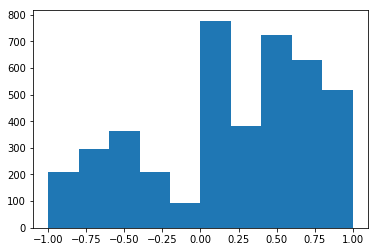

In [4]:
plt.hist(scores,bins=[-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])

(array([2.523e+03, 1.206e+03, 4.510e+02, 2.800e+01, 1.000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 5 Patch objects>)

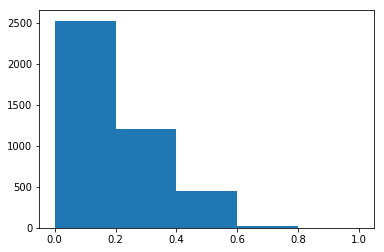

In [5]:
plt.hist(positive,bins=[0,0.2,0.4,0.6,0.8,1])

(array([3.507e+03, 6.310e+02, 6.900e+01, 2.000e+00, 0.000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 5 Patch objects>)

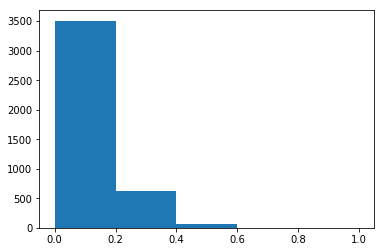

In [6]:
plt.hist(negative,bins=[0,0.2,0.4,0.6,0.8,1])


(array([1.000e+00, 3.600e+01, 7.530e+02, 1.835e+03, 1.584e+03]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 5 Patch objects>)

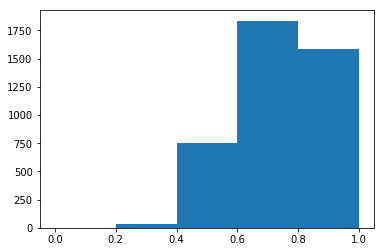

In [8]:
plt.hist(neut,bins=[0,0.2,0.4,0.6,0.8,1])

In [9]:
data["vaderScore"] = scores
#data["vaderPos"] = positive
#data["vaderNeg"] = negative
#data["vaderNeut"] = neut



In [10]:
data.drop(["in_reply_to_user_id_str","is_retweet","text","modded_text","modded1","year","date"],axis=1,inplace=True)
data

favorite_count  retweet_count  month  hour  week_year  \
25967            6735           2108      1     0         53   
25968            8581           3460      1     3         53   
25970            8258           1948      1     6         53   
25971            7490           2721      1     6         53   
25972            3330            933      1    21         53   
25973            8495           2642      1    23         53   
25974            2780            654      1    23         53   
25975            3066            893      1    23         53   
25976            3492            881      1    23         53   
25977            3346            922      1    23         53   
25978            5481           1688      1    23         53   
25979            4401            986      1    23         53   
25980           10339           3759      1    23         53   
25981            6334           1910      1     3         53   
25982            7340           3057      1     3         53   
25983            6363           2145      1     4         53   
25984            5802           2124      1    12         53   
25985            5458           1749      1    12         53   
25986           14673           7832      1    13         53   
25987            6568           2238      1    20         53   
25988            8017           3609      1    20         53   
25989            9075           3745      1    21         53   
25990           15803           6065      1    21         53   
25991            5756           1609      1    22         53   
25992            6955           1763      1     0         53   
25993               0           1931      1     4         53   
25994            4528           1706      1     4         53   
25995            5815           2472      1     4         53   
25996            3224            894      1     5         53   
25997            3649           1030      1     5         53   
...               ...            ...    ...   ...        ...   
30161          120217          31424     12     1         51   
30162           54251          15510     12    11         51   
30163           64566          14571     12    11         51   
30164           98907          33870     12    20         51   
30165           51789          18801     12    21         51   
30166           65946          17989     12    21         51   
30167          112957          31749     12     0         51   
30168           62856          16670     12    20         51   
30169           83507          19826     12    21         51   
30170           84565          22072     12    21         51   
30171            5871           1482     12     0         51   
30173          212467          50193     12    17         51   
30174           91300          22240     12    21         52   
30175           77746          22128     12    21         52   
30176          128341          30090     12    23         52   
30177           71643          17414     12     2         52   
30178           67470          15256     12     3         52   
30179           99838          23222     12    21         52   
30180           78521          19159     12     3         52   
30181          117900          31799     12    14         52   
30182          106626          30237     12    14         52   
30183          117710          34542     12    14         52   
30184           51857          13919     12    22         52   
30185           45609          11330     12    14         52   
30186           97669          34415     12    19         52   
30187           25336           7366     12    19         52   
30188           84254          23213     12    22         52   
30189          350860         141853     12    13         52   
30190           55601           9529     12    18         52   
30191               0           9529     12    18         52   

                                      

In [11]:
data.corr()

favorite_count  retweet_count     month      hour  week_year  \
favorite_count        1.000000       0.908397  0.464811  0.003317   0.443658   
retweet_count         0.908397       1.000000  0.421107  0.015665   0.400986   
month                 0.464811       0.421107  1.000000 -0.049998   0.936428   
hour                  0.003317       0.015665 -0.049998  1.000000  -0.043332   
week_year             0.443658       0.400986  0.936428 -0.043332   1.000000   
labels                0.060065       0.027518 -0.005117 -0.003687  -0.009679   
vaderScore           -0.023446      -0.061607 -0.018083 -0.047063  -0.017179   

                  labels  vaderScore  
favorite_count  0.060065   -0.023446  
retweet_count   0.027518   -0.061607  
month          -0.005117   -0.018083  
hour           -0.003687   -0.047063  
week_year      -0.009679   -0.017179  
labels          1.000000   -0.113077  
vaderScore     -0.113077    1.000000

0.1724145165122357


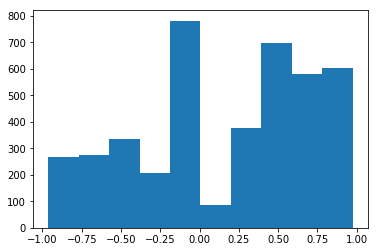

In [90]:
plt.hist(data["vaderScore"])
print(data["vaderScore"].mean())

# Attempt clustering only on vader score and time only

In [127]:
data1 = data.drop(["favorite_count","retweet_count","noTags_punct","modded1_stemmed","labels","month","hour"],axis=1)
data1

week_year  vaderScore
25967         53      0.7519
25968         53      0.8384
25970         53      0.9230
25971         53     -0.8478
25972         53      0.7351
25973         53      0.6325
25974         53      0.8442
25975         53      0.5673
25976         53      0.7469
25977         53      0.6900
25978         53      0.0000
25979         53      0.7759
25980         53      0.0000
25981         53      0.8777
25982         53      0.7592
25983         53      0.0000
25984         53     -0.7424
25985         53      0.6996
25986         53     -0.1386
25987         53     -0.5596
25988         53     -0.1759
25989         53      0.7500
25990         53      0.6900
25991         53      0.6696
25992         53      0.6239
25993         53      0.8777
25994         53     -0.6249
25995         53      0.4738
25996         53      0.4926
25997         53      0.4559
...          ...         ...
30161         51     -0.1593
30162         51     -0.2960
30163         51      0.5623
30164         51      0.0000
30165         51     -0.9313
30166         51     -0.8950
30167         51     -0.2730
30168         51     -0.6114
30169         51     -0.3164
30170         51      0.5719
30171         51      0.5411
30173         51      0.8529
30174         52     -0.4294
30175         52      0.4593
30176         52      0.6239
30177         52      0.4753
30178         52      0.8016
30179         52      0.7794
30180         52      0.7772
30181         52      0.5255
30182         52      0.3400
30183         52     -0.1984
30184         52      0.4404
30185         52      0.0000
30186         52      0.7257
30187         52      0.6249
30188         52      0.2695
30189         52     -0.4911
30190         52      0.6114
30191         52      0.6114

[4209 rows x 2 columns]

In [128]:
true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=10)
model.fit(data1)
print(model.inertia_)
print
#con l'ultima maniera è più bassa di 1000 rispetto a fede, viene tipo 2400 alei 3800
print("Top terms per cluster 0: ")
labels = model.labels_
data1["vader_labels"] = labels
d = silhouette_score(data1, labels,metric='euclidean')
print(d)

9829.765907107472
Top terms per cluster 0: 
0.7112543115324562


234


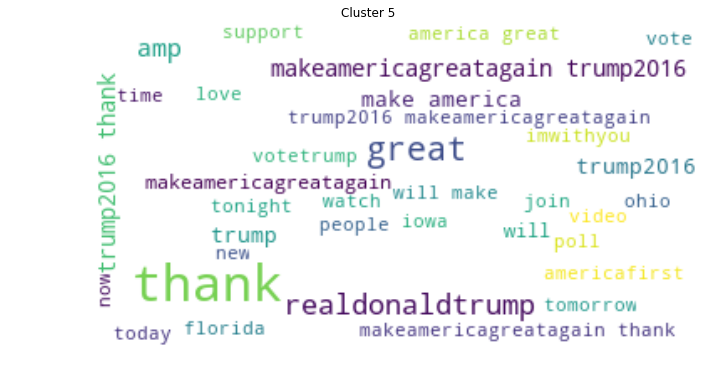

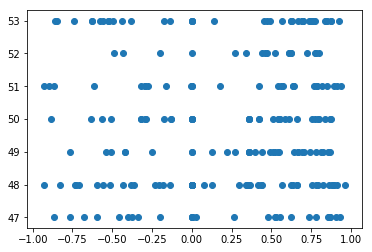

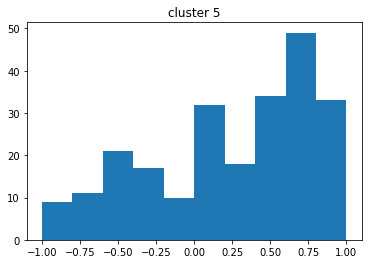

547


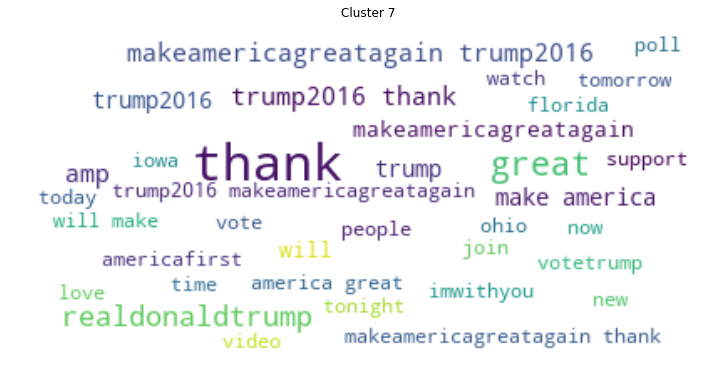

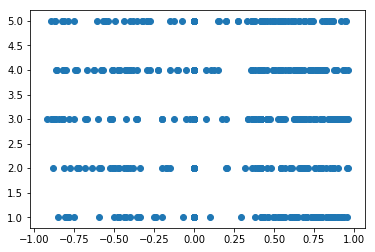

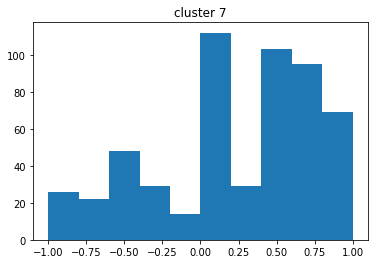

496


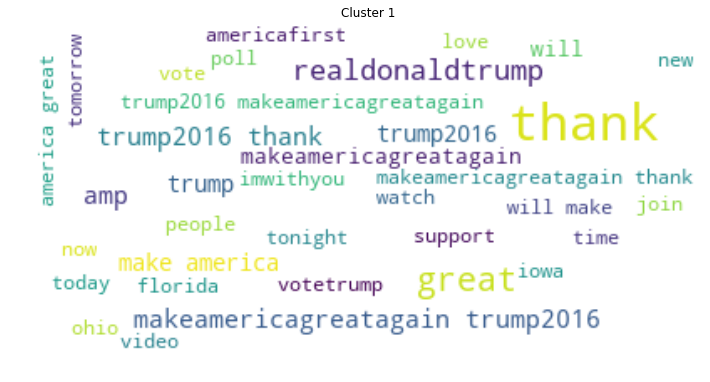

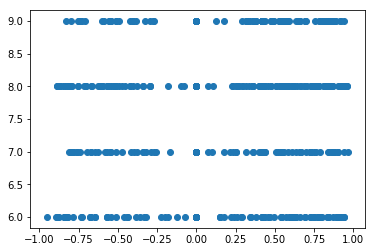

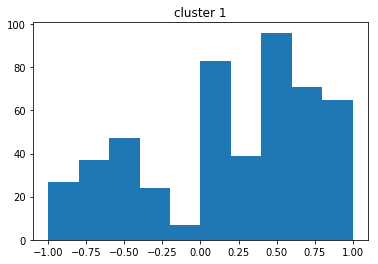

492


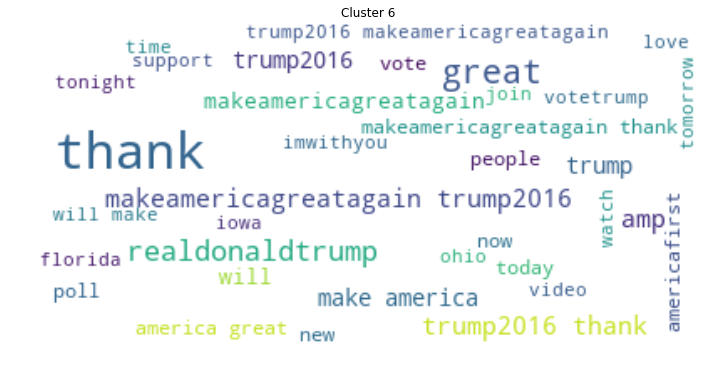

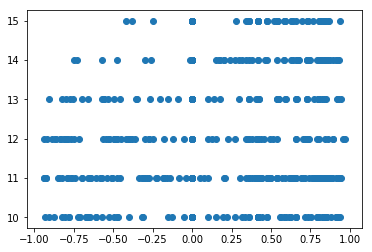

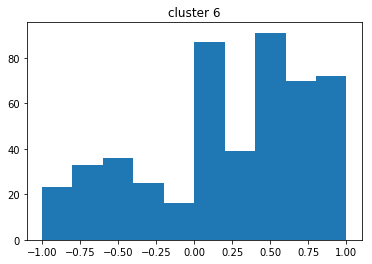

457


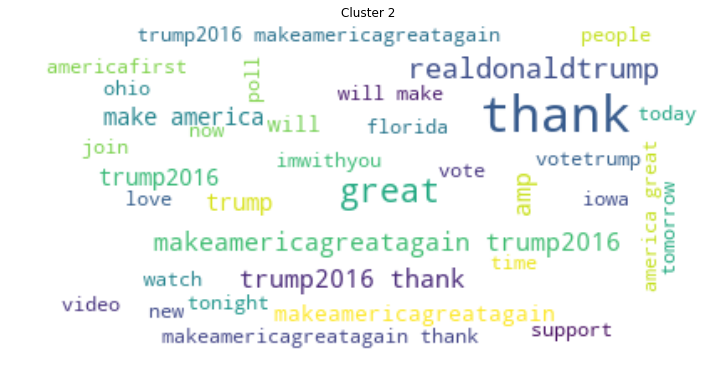

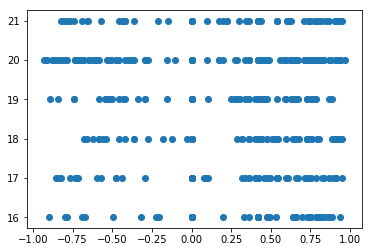

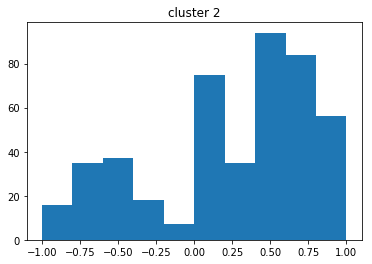

409


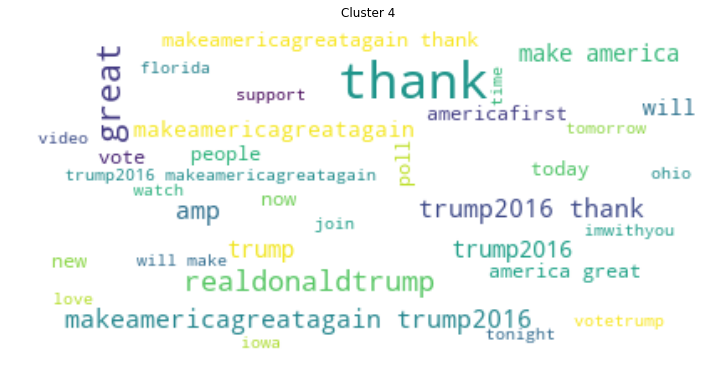

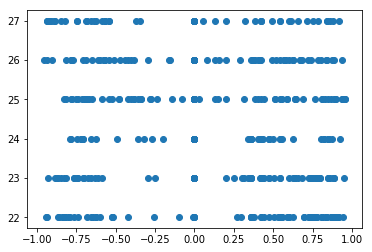

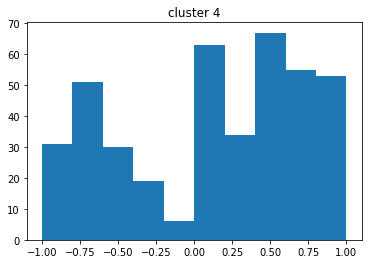

478


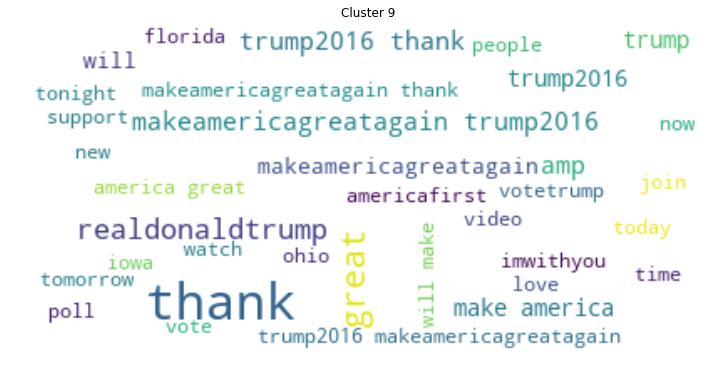

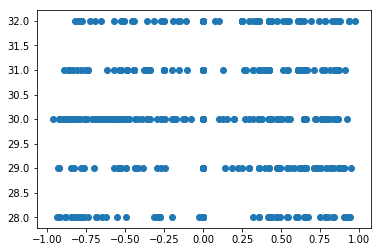

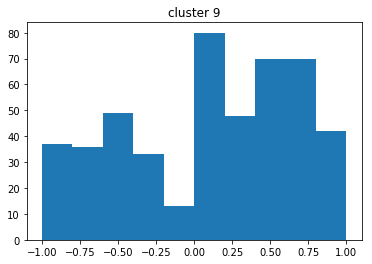

297


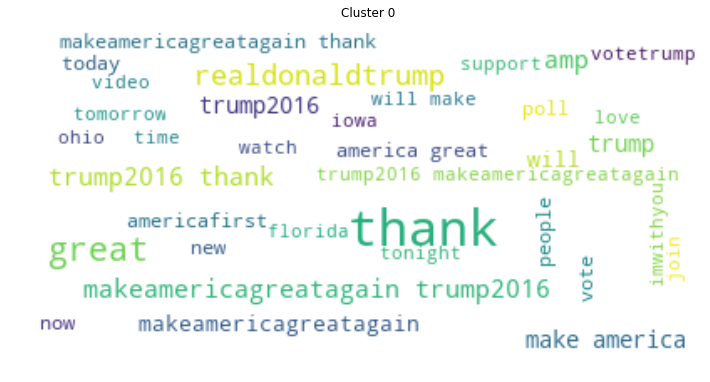

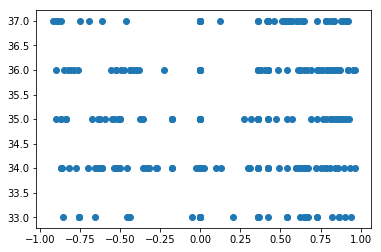

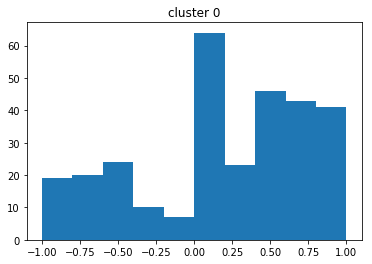

384


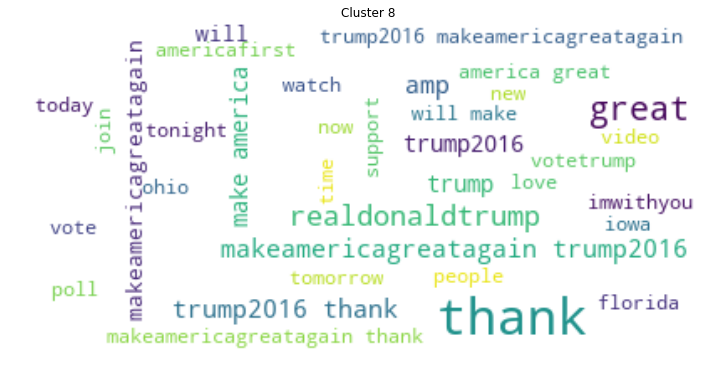

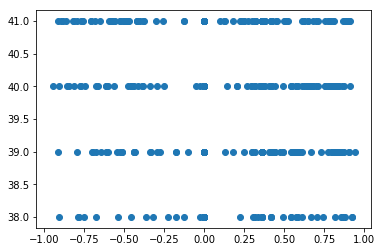

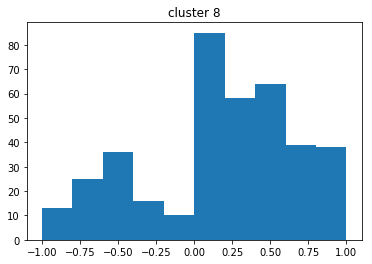

415


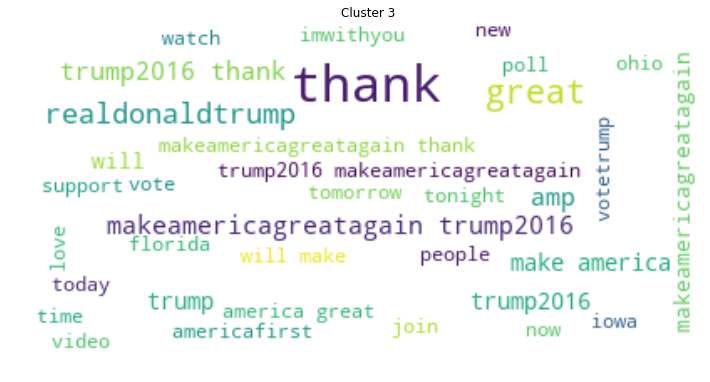

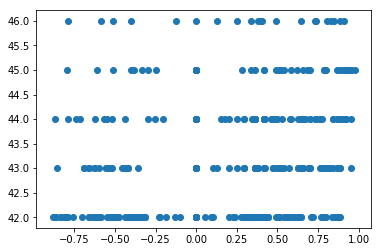

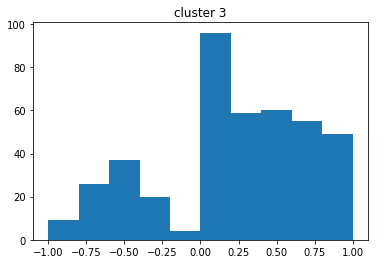

In [131]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

for c in data1["vader_labels"].unique():
    d = data1[data1["vader_labels"] == c]
    print(len(d))
    text = res["noTags_punct"] 
    text = text.str.cat(sep=' ')
    wordcloud = WordCloud(max_font_size=30, max_words=35, background_color="white").generate(text)
    plt.figure(figsize=(12,10))    
    plt.title("Cluster " + str(c))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    plt.scatter(d["vaderScore"],d["week_year"])
    plt.show()
    
    plt.hist(d["vaderScore"],bins = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
    plt.title("cluster " + str(c))
    plt.show()

In [34]:
x1 = data[data["labels"] == 0]
print(len(x1))
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# create a dataframe from a word matrix
def wm2df(wm, feat_names):
    
    # create an index for each row
    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm.toarray(),
                      columns=feat_names)
    return(df)
  

stemmed_words = pd.Series(' '.join(data['modded1_stemmed']).split()).value_counts()
stemmed_words = stemmed_words[stemmed_words < 300]
stemmed_words = stemmed_words[stemmed_words > 3]
x1['m'] = data['modded1_stemmed'].apply(lambda x: " ".join(x for x in x.split() if x in stemmed_words))

corpus = x1["m"].tolist()

# instantiate the vectorizer object
cvec = TfidfVectorizer()

# convert the documents into a document-term matrix
wm = cvec.fit_transform(corpus)

# retrieve the terms found in the corpora
tokens = cvec.get_feature_names()

# create a dataframe from the matrix
c = wm2df(wm, tokens)

982


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(array([1.428e+03, 1.330e+02, 3.800e+01, 2.400e+01, 1.500e+01, 7.000e+00,
        6.000e+00, 1.000e+00, 4.000e+00, 4.000e+00]),
 array([  4. ,  33.2,  62.4,  91.6, 120.8, 150. , 179.2, 208.4, 237.6,
        266.8, 296. ]),
 <a list of 10 Patch objects>)

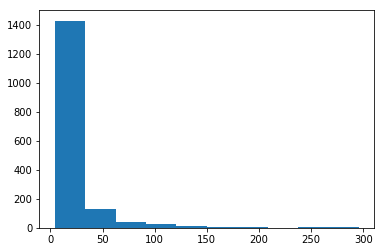

In [35]:
plt.hist(stemmed_words)

In [36]:
x1.reset_index(inplace=True,drop=True)
res = pd.concat([x1,c], axis=1)
res1 = res.drop(["noTags_punct","modded1_stemmed","labels","favorite_count","retweet_count","m"],axis=1)
res

favorite_count  retweet_count  month  hour  week_year  \
0              8581           3460      1     3         53   
1              8258           1948      1     6         53   
2              2780            654      1    23         53   
3              3066            893      1    23         53   
4              3492            881      1    23         53   
5              4401            986      1    23         53   
6              6334           1910      1     3         53   
7              7340           3057      1     3         53   
8              5756           1609      1    22         53   
9              4528           1706      1     4         53   
10             5815           2472      1     4         53   
11            32185          17960      1    14         53   
12             6401           2307      1    16         53   
13             4378           1656      1     0          1   
14             3996           1108      1     3          1   
15             1805            681      1     3          1   
16             2693            717      1     3          1   
17             5227           1818      1    16          1   
18             4827           1127      1     3          1   
19             4837           1417      1     3          1   
20             5933           2162      1    22          1   
21             6235           2558      1    22          1   
22             5718           2423      1    23          1   
23             6343           1913      1     2          1   
24             4034           1368      1    14          1   
25             2749           1070      1    16          1   
26             2823            798      1    16          1   
27             3791           1102      1    17          1   
28             3420           1264      1    13          1   
29             9810           3766      1     0          2   
..              ...            ...    ...   ...        ...   
952               0          11738     11    23         45   
953               0          19926     11    23         45   
954          169729          45576     11    19         45   
955           68659          17384     11    11         47   
956          162476          53442     11    20         47   
957           30094           7922     11     2         48   
958           32567           7723     11     2         48   
959           30567           8024     11    15         48   
960           72196          17283     12     2         48   
961          111106          24700     12     0         48   
962           37901           9328     12    16         48   
963           36249           7661     12     3         49   
964           40714           9404     12     3         49   
965           23051           5347     12    19         49   
966           36425           9048     12    22         49   
967           38254           9137     12     3         49   
968           42663           9687     12     3         50   
969           57035          10718     12    13         50   
970           38166           8906     12     1         50   
971           70675          18146     12    16         50   
972           43359          11064     12     3         50   
973           35184           7098     12    13         50   
974           40187           8227     12    13         50   
975           54845          12972     12     0         50   
976          223249          59296     12    23         51   
977           50087          10436     12     2         51   
978           77746          22128     12    21         52   
979           99838          23222     12    21         52   
980           51857          13919     12    22         52   
981          350860         141853     12    13         52   

                                          noTags_punct  \
0                     happy new year amp thank you       
1    happy new year from   thank you to my g

# KMEANS

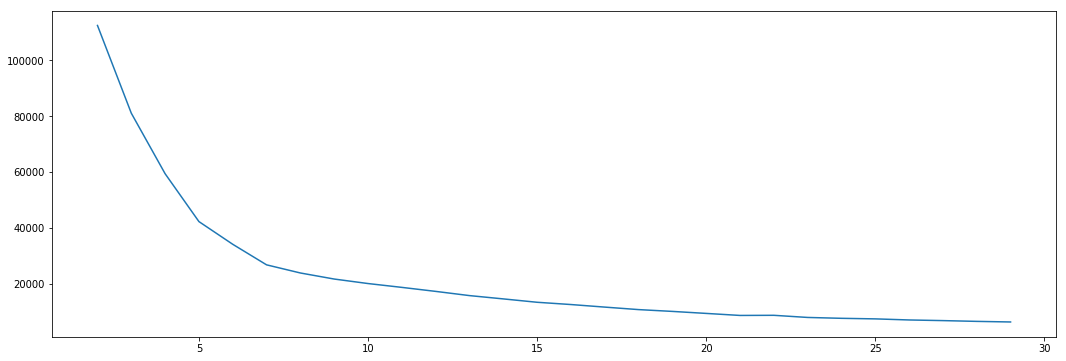

CPU times: user 3min 6s, sys: 6min 41s, total: 9min 48s
Wall time: 24.9 s


In [37]:
%%time
sse_list = list()
max_k = 30
plt.figure(figsize=(18,6))
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(res1)
    sse = kmeans.inertia_
    sse_list.append(sse)
plt.plot(range(2,max_k), sse_list)
plt.show()

In [68]:
true_k = 25
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=10)
model.fit(res1)
print(model.inertia_)
print
#con l'ultima maniera è più bassa di 1000 rispetto a fede, viene tipo 2400 alei 3800
print("Top terms per cluster 0: ")
labels = model.labels_
res1["labels"] = labels
d = silhouette_score(res1, labels,metric='euclidean')
print(d)

7731.750326071715
Top terms per cluster 0: 
0.5789215963701714


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


6


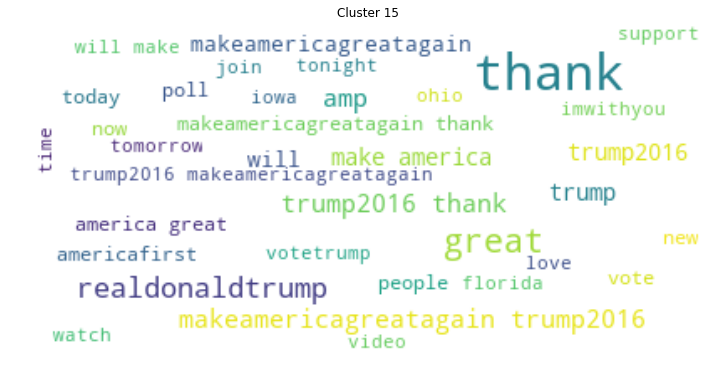

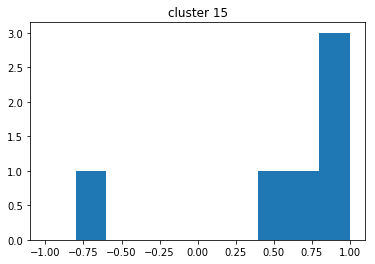

7


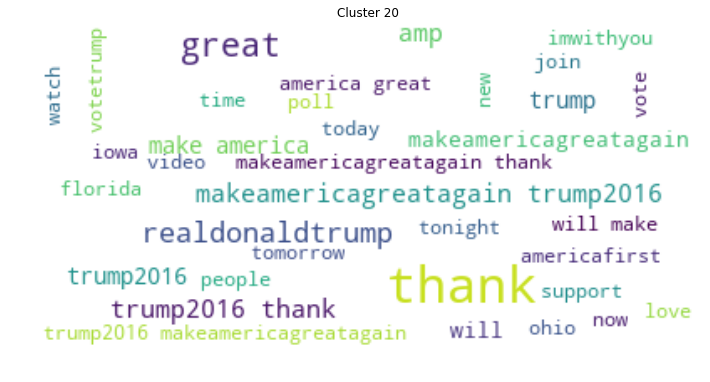

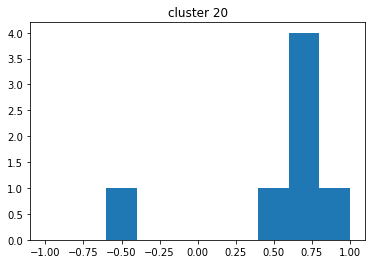

32


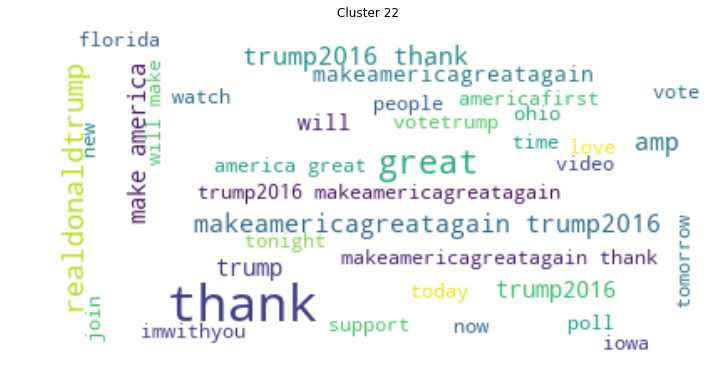

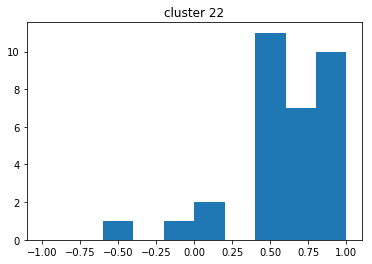

51


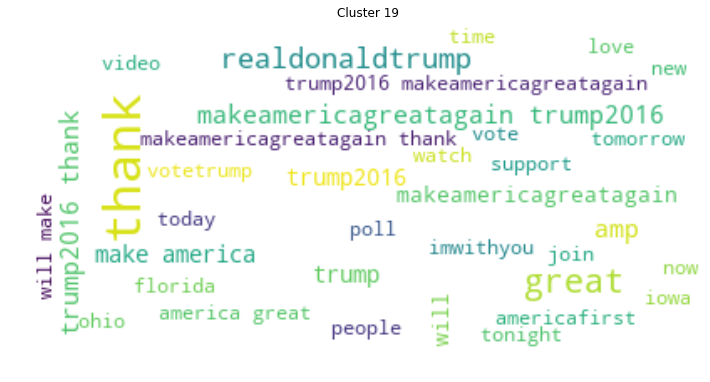

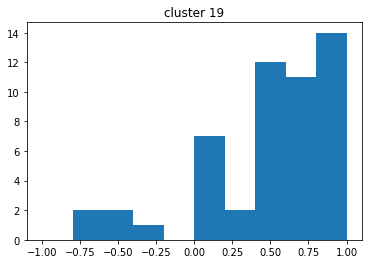

55


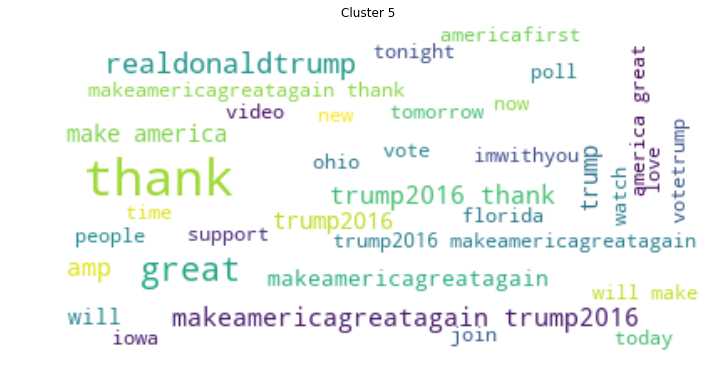

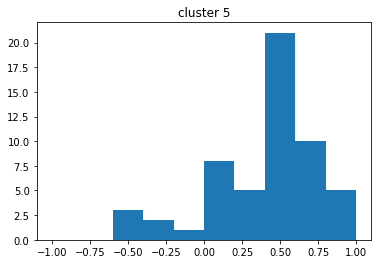

36


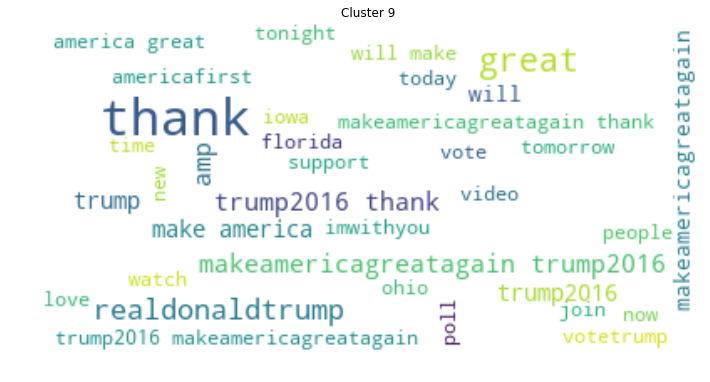

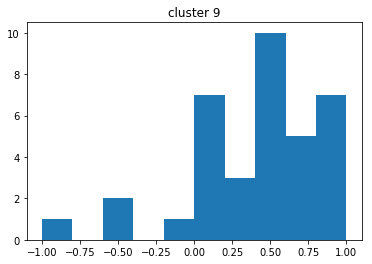

51


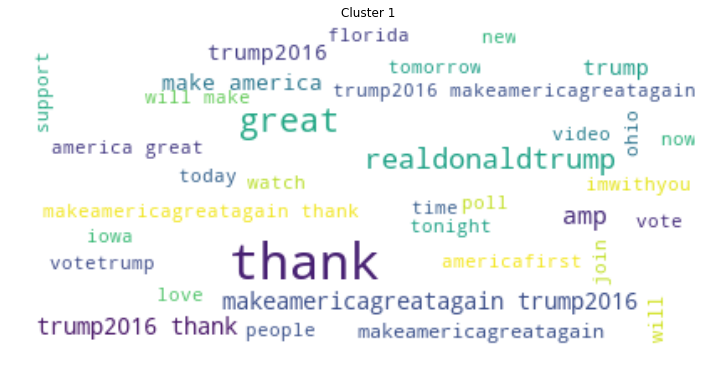

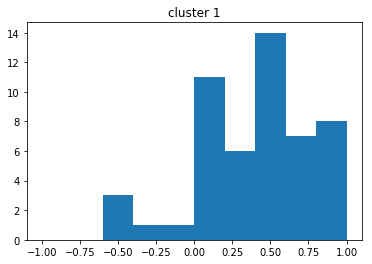

56


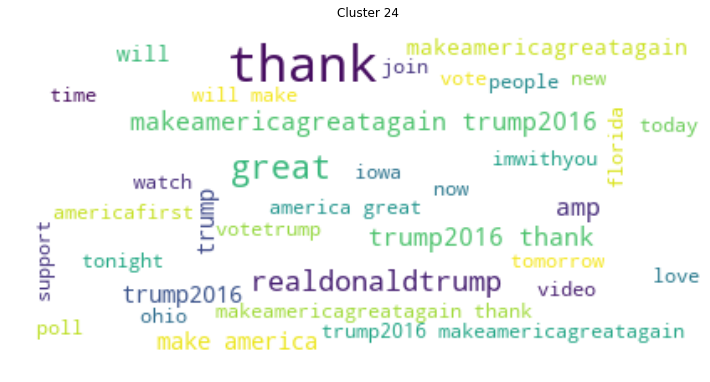

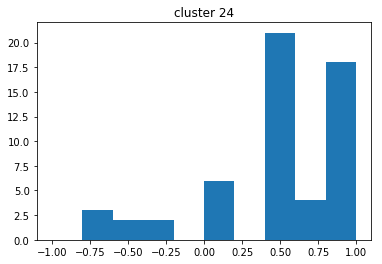

64


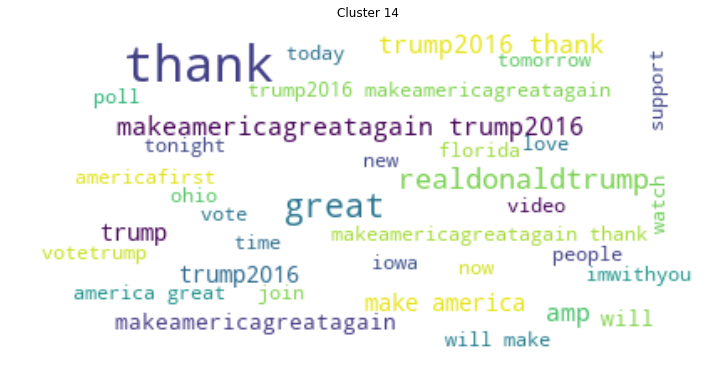

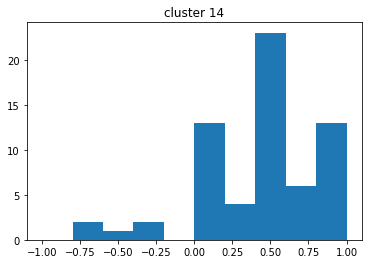

40


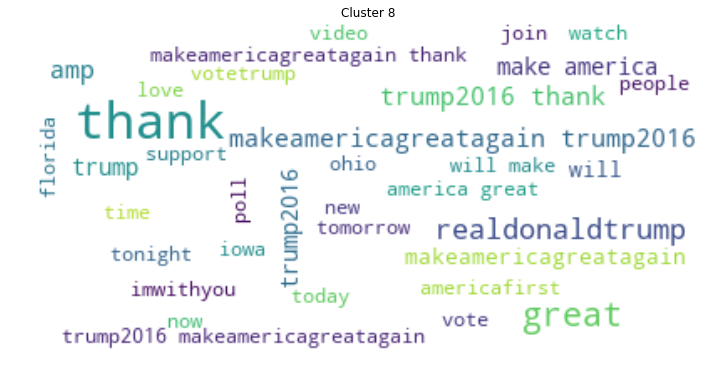

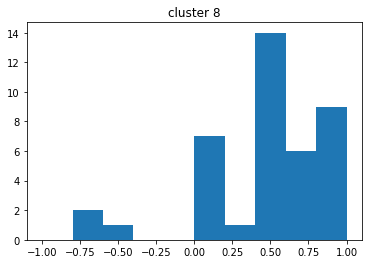

49


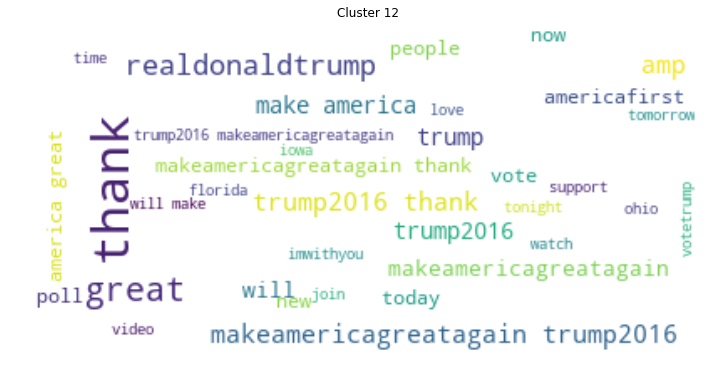

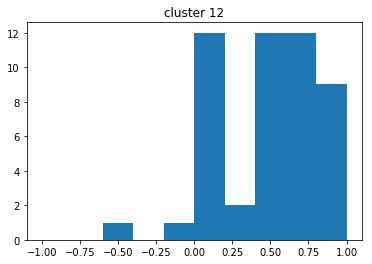

43


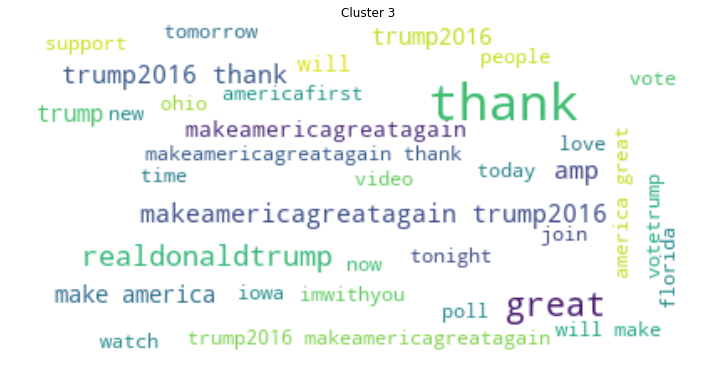

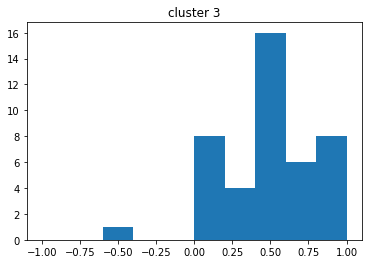

48


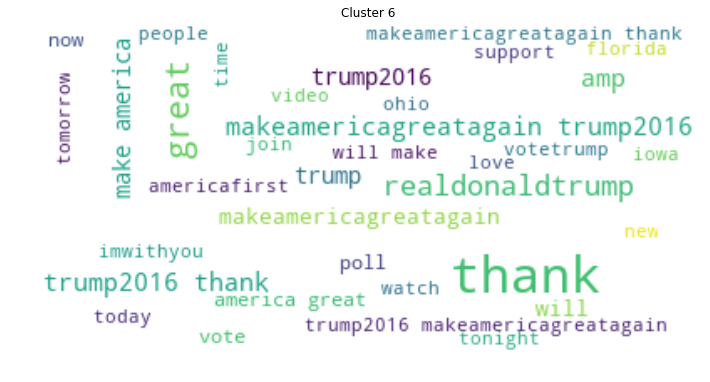

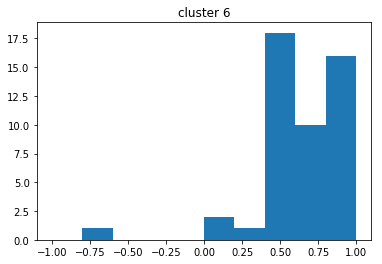

44


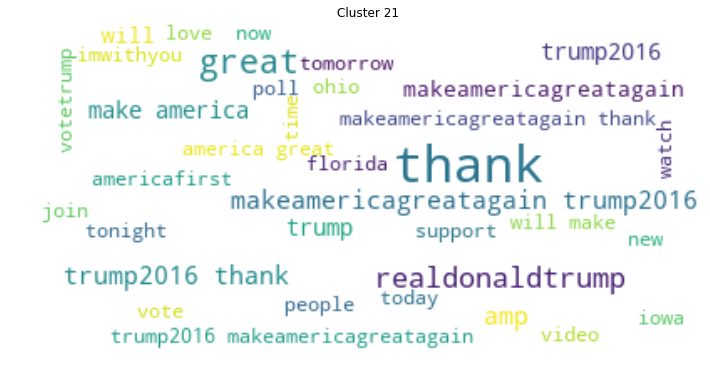

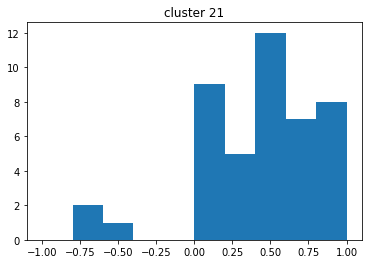

40


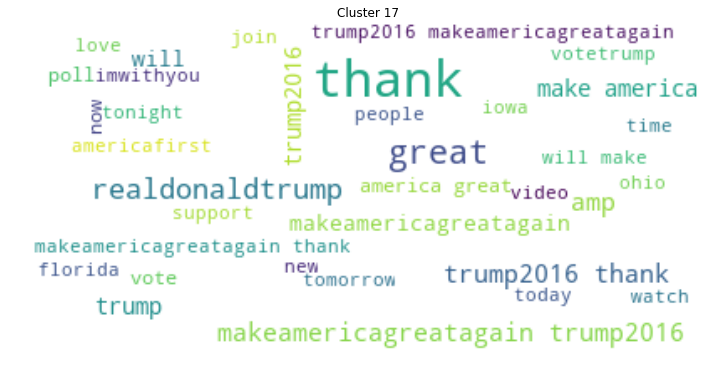

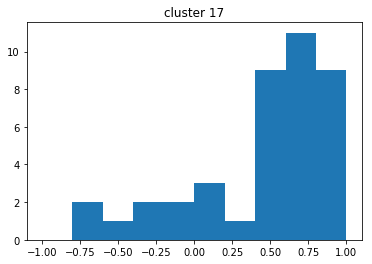

33


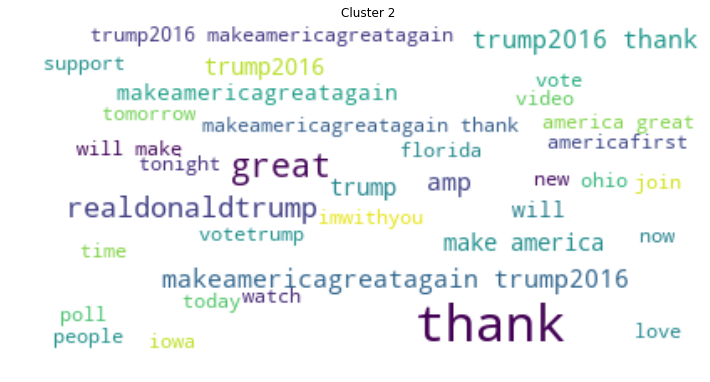

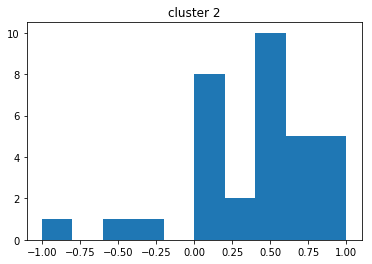

50


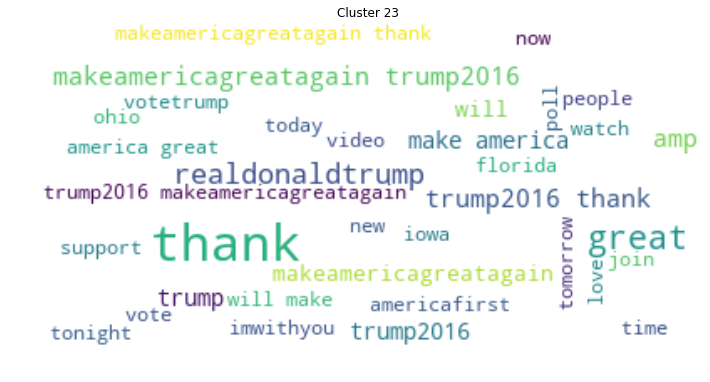

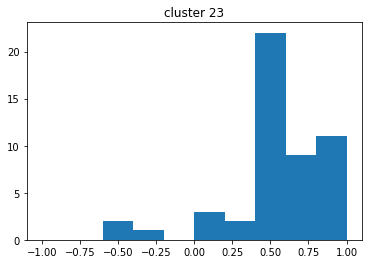

44


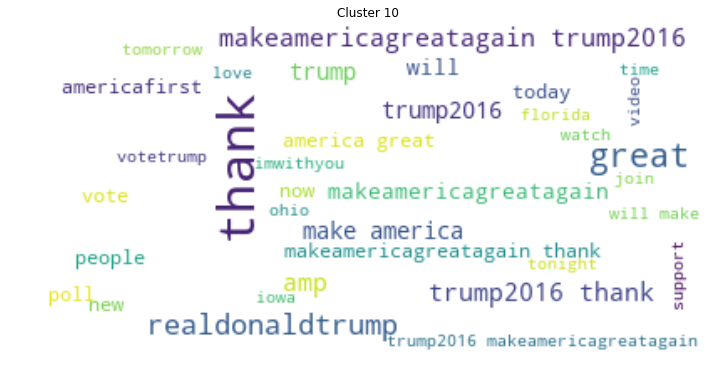

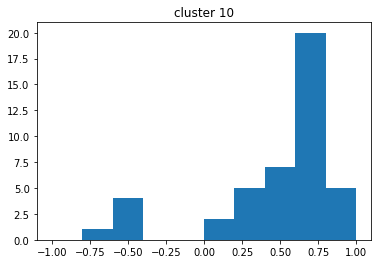

31


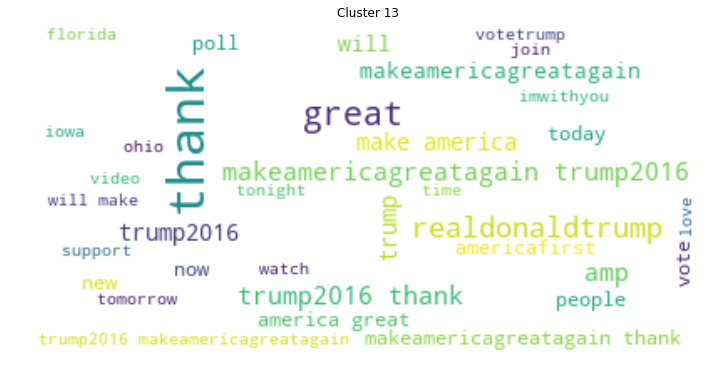

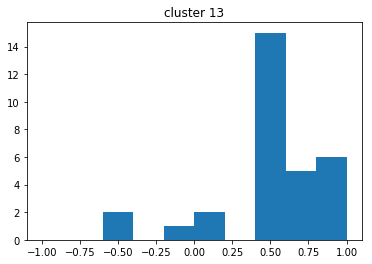

36


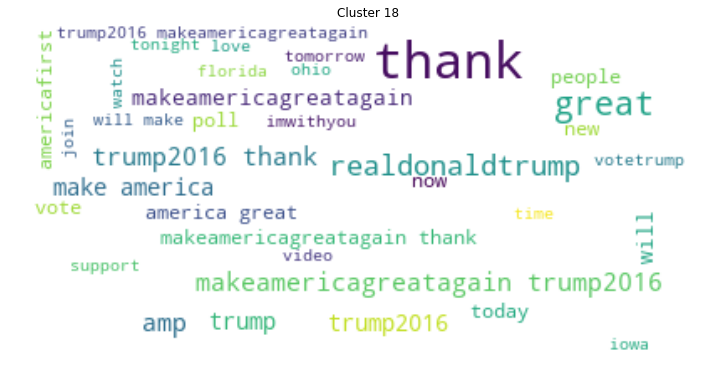

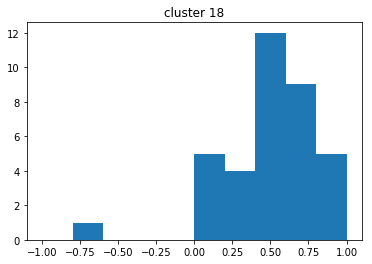

41


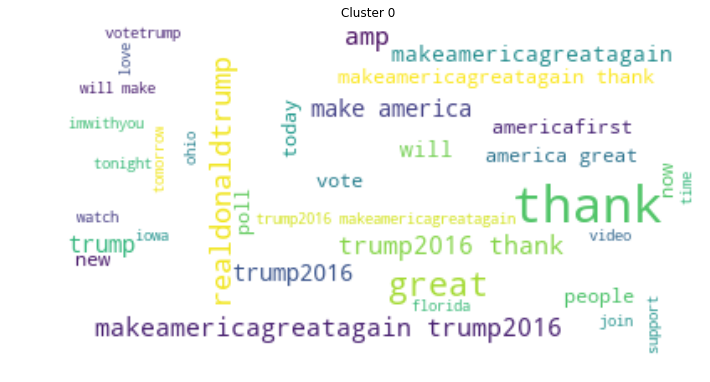

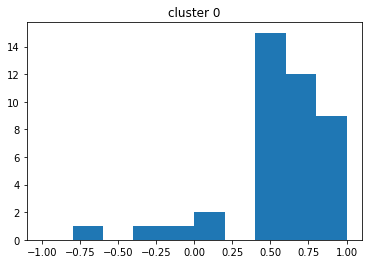

40


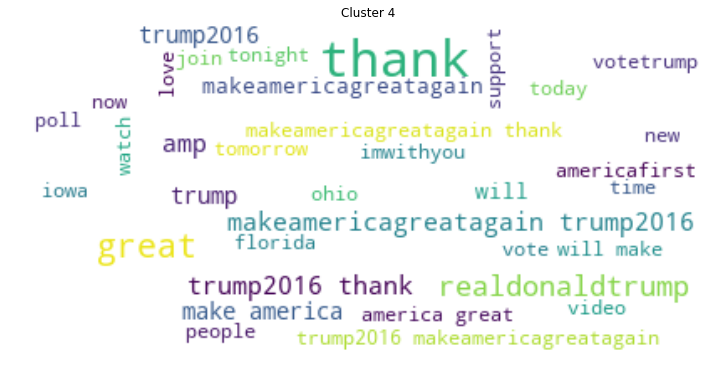

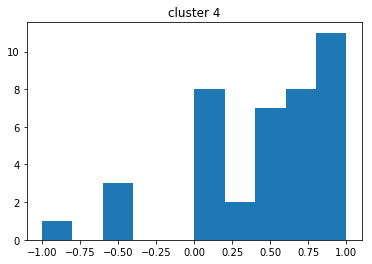

28


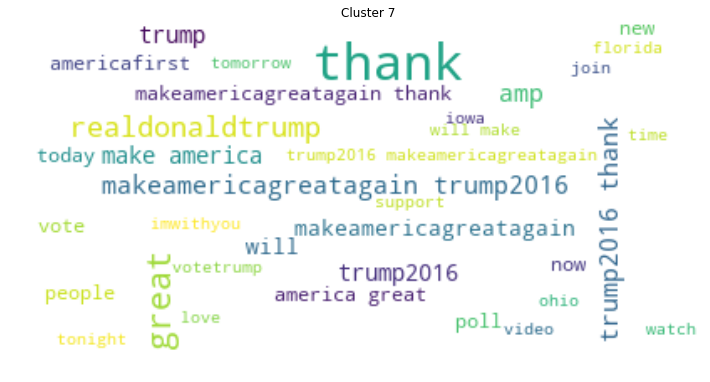

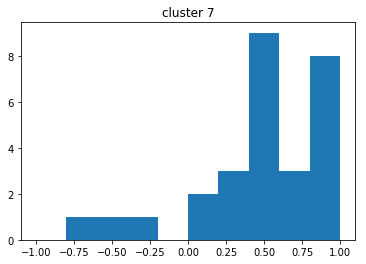

42


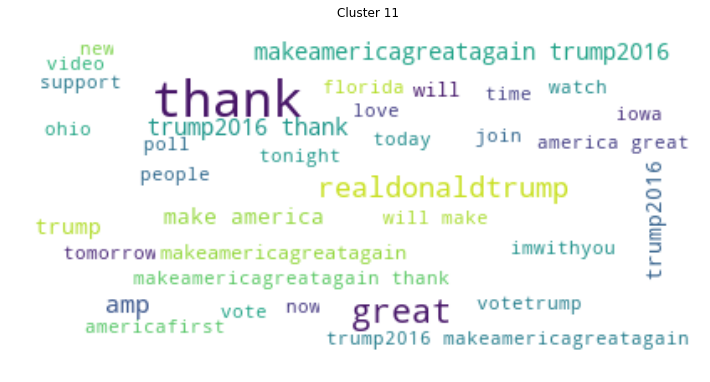

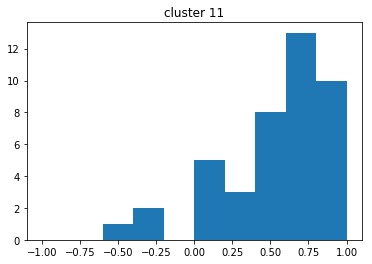

15


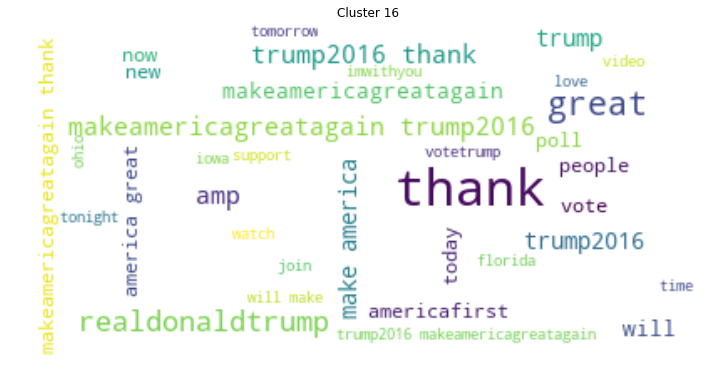

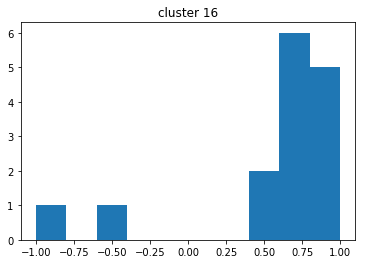

In [69]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

for c in res1["labels"].unique():
    d = res1[res1["labels"] == c]
    print(len(d))
    text = res["noTags_punct"] 
    text = text.str.cat(sep=' ')
    wordcloud = WordCloud(max_font_size=30, max_words=35, background_color="white").generate(text)
    plt.figure(figsize=(12,10))    
    plt.title("Cluster " + str(c))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    
    plt.hist(d["vaderScore"],bins = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
    plt.title("cluster " + str(c))
    plt.show()
    


In [74]:
#per descrivere i cluster prendi i valori con tfidf più alto
g = res1.drop(['month', 'hour', 'week_year',"vaderScore"],axis=1)

for cluster in g["labels"].unique():
    g1 = g[g["labels"] == cluster]
    meanTf = []
    for column in g1.columns:
        if column != "labels":
            m = g1[column].mean()
            meanTf.append([column,m])
    
    meanTfOrdered = sorted(meanTf, key=itemgetter(1),reverse = True)
    print("cluster ",cluster," lunghezza ", len(g1), ":\n", str(meanTfOrdered[0:5]) + "\n")
    el = random.randint(g1.index[0],g1.index[len(g1)-1])
    el1 = random.randint(g1.index[0],g1.index[len(g1)-1])
    el2 = random.randint(g1.index[0],g1.index[len(g1)-1])
    print(res.iloc[el]["noTags_punct"] + "\n")
    print(res.iloc[el1]["noTags_punct"]+ "\n")
    print(res.iloc[el2]["noTags_punct"]+ "\n")

cluster  15  lunghezza  6 :
 [['year', 0.25676942064424374], ['happi', 0.1935813636546778], ['new', 0.12378071991134461], ['support', 0.12294213678088532], ['votetrump2016', 0.12008557376293784]]

happy new year amp thank you    

happy new year from   thank you to my great family for all of their support  

jodil792 we are standing with you spreading the wordtrump for president 2016 i wake amp sleep praying for you amp the usaisrael2

cluster  20  lunghezza  7 :
 [['2016', 0.13995669158041313], ['polit', 0.11622586676985514], ['support', 0.11604648339717273], ['get', 0.08702281568140145], ['bless', 0.08324822252071933]]

heading to biloxi mississippi massive crowds expected thank you for your support votetrump2016  

thank you biloxi mississippi remember this night amp spread the word to get out amp    

hillary said that guns dont keep you safe if she really believes that she should demand that her heavily armed bodyguards quickly disarm

cluster  22  lunghezza  32 :
 [['tonight', 0.

just got back from asheville north carolina where we had a massive rally the spirit of the crowd was unbelievable thank you maga

while hillary profits off the rigged system i am fighting for you remember the simple phrase    

thank you henderson nv this is a movement like never seen before watch some of the rally via my facebook page   

cluster  0  lunghezza  41 :
 [['americafirst', 0.06109318611296635], ['maga', 0.05564465862085599], ['america', 0.049589785591831234], ['ohio', 0.04700699791779747], ['togeth', 0.041269816602233424]]

voter registration deadlines today you can register now at   and get out to   

thank you for having me i enjoyed the tour and spending time with everyone see you soon maga  

thank you for joining me this afternoon new hampshire will be back soon   speech transcript   

cluster  4  lunghezza  40 :
 [['draintheswamp', 0.07843627507093706], ['bigleaguetruth', 0.053435670632945645], ['togeth', 0.04860272260644226], ['debat', 0.047311341213029254], ['ameri

# potrebbero migliorare togliendo i termini più e meno frequenti

# hierarchical

In [75]:
from sklearn.cluster import AgglomerativeClustering
sil = []
for c in range(2,40):
    clustering = AgglomerativeClustering(affinity='cosine', linkage='complete', n_clusters=c)
    clustering.fit(res1)
    labels = clustering.labels_
    d = silhouette_score(res1, labels,metric='cosine')
    sil.append(d)
    print(c,d)

2 0.5036909342689043
3 0.5797904685681063
4 0.5678085158362358
5 0.6123337523129715
6 0.6700312983650346
7 0.6901378543321374
8 0.7065516580112599
9 0.6896866125046823
10 0.6601366627616806
11 0.6229729674296575
12 0.633617961534045
13 0.6137675278396044
14 0.5709291779750783
15 0.5934106774703959
16 0.5923695133106052
17 0.5651728361801893
18 0.5942558438845629
19 0.5758561653406793
20 0.6333370740180295
21 0.6395693353491678
22 0.6313648924558499
23 0.6184979530986353
24 0.622619300744513
25 0.6153161455195442
26 0.6233046268465071
27 0.6064206298800143
28 0.6023919540929528
29 0.5845328055617165
30 0.5798696066857995
31 0.5612245909676721
32 0.5774173056247487
33 0.574385938002971
34 0.5681262481523418
35 0.5498139065233798
36 0.5492693355550866
37 0.550546718113221
38 0.5479784621931061
39 0.5391509425929679


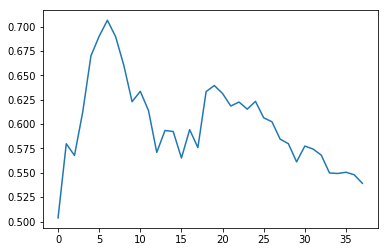

In [76]:
plt.plot([x for x in range(len(sil))],sil)

In [85]:
clustering = AgglomerativeClustering(affinity='cosine', linkage='complete', n_clusters=4)
clustering.fit(res1)
labels = clustering.labels_
res1["labels"] = labels

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


396


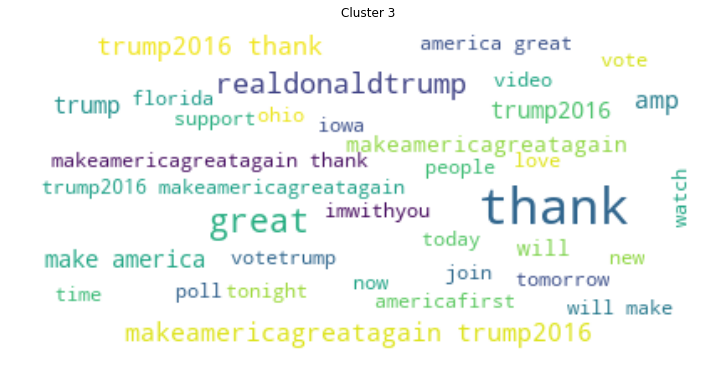

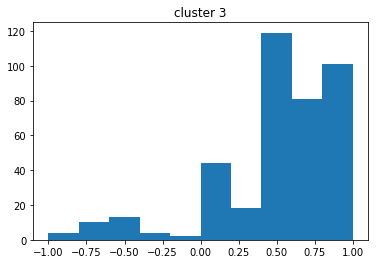

6


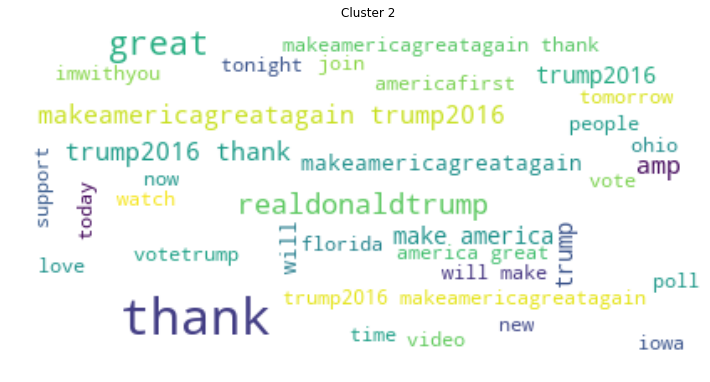

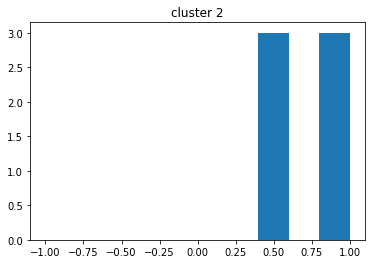

207


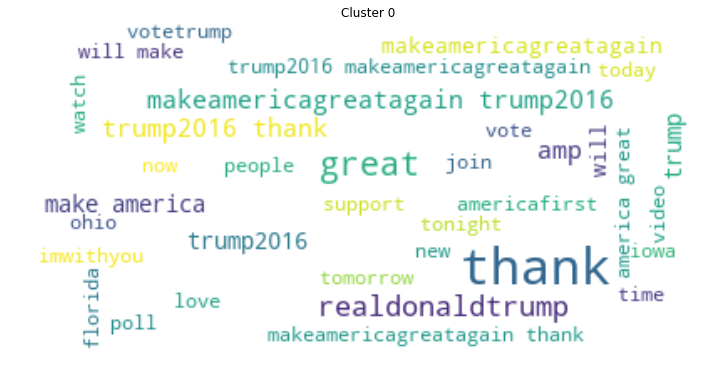

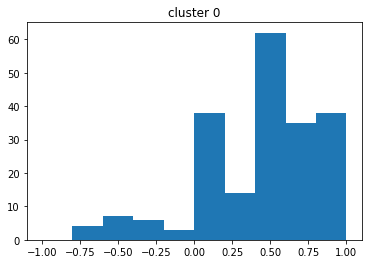

373


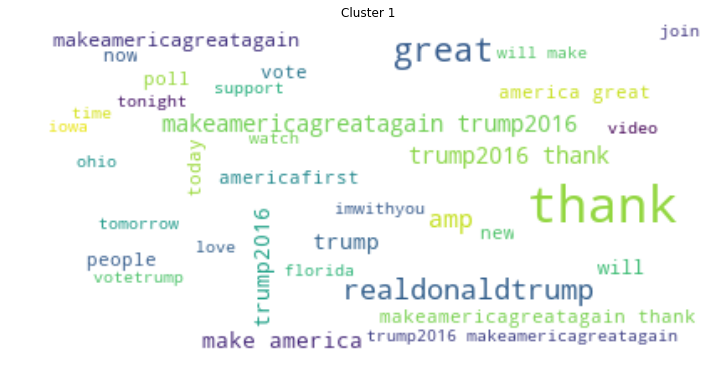

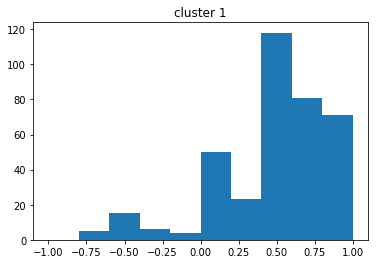

In [86]:

for c in res1["labels"].unique():
    d = res1[res1["labels"] == c]
    print(len(d))
    text = res["noTags_punct"] 
    text = text.str.cat(sep=' ')
    wordcloud = WordCloud(max_font_size=30, max_words=35, background_color="white").generate(text)
    plt.figure(figsize=(12,10))    
    plt.title("Cluster " + str(c))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    
    plt.hist(d["vaderScore"],bins = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
    plt.title("cluster " + str(c))
    plt.show()
    

In [87]:
res[res1["labels"] == 2]["noTags_punct"].tolist()

['icareeguns this iowan is voting for realdonaldtrump   thank you for supporting iowa   my great honor',
 'thank you to our law enforcement officers lesm trump2016  ',
 'thank you michael harrison   for your kind words  greatly appreciated',
 'geraldorivera thank you geraldo for your nice words on oreillyfactor tonight you are a true champion thank ericbolling  great guy',
 'thank you iowa fitn iacaucus makeamericagreatagain trump2016  ',
 'just watched jebs ad where he desperately needed mommy to help him jeb  mom cant help you with isis the chinese or with putin']

In [88]:
g = res1.drop(['month', 'hour', 'week_year',"vaderScore"],axis=1)

for cluster in g["labels"].unique():
    g1 = g[g["labels"] == cluster]
    meanTf = []
    for column in g1.columns:
        if column != "labels":
            m = g1[column].mean()
            meanTf.append([column,m])
    
    meanTfOrdered = sorted(meanTf, key=itemgetter(1),reverse = True)
    print("cluster ",cluster," lunghezza ", len(g1), ":\n", str(meanTfOrdered[0:5]) + "\n")
    el = random.randint(g1.index[0],g1.index[len(g1)-1])
    el1 = random.randint(g1.index[0],g1.index[len(g1)-1])
    el2 = random.randint(g1.index[0],g1.index[len(g1)-1])
    print(res.iloc[el]["noTags_punct"] + "\n")
    print(res.iloc[el1]["noTags_punct"]+ "\n")
    print(res.iloc[el2]["noTags_punct"]+ "\n")

cluster  3  lunghezza  396 :
 [['makeamericagreatagain', 0.05681023266722004], ['americafirst', 0.02881430321071368], ['new', 0.028796428210567347], ['imwithy', 0.027147066811788006], ['america', 0.02570307138589557]]

make america great again make america safe again trump2016 americafirst  

thank you trump2016  

just got back from asheville north carolina where we had a massive rally the spirit of the crowd was unbelievable thank you maga

cluster  2  lunghezza  6 :
 [['iowa', 0.16860470819606102], ['word', 0.11745305986186794], ['iacaucu', 0.10111914433867185], ['honor', 0.09696128619078144], ['fitn', 0.09503044742263693]]

on my way to iowa just received new national poll numbers thank you makeamericagreatagain trump2016  

thank you trump2016  

big announcement in ames iowa on tuesday you will not want to miss this rally trump2016    

cluster  0  lunghezza  207 :
 [['makeamericagreatagain', 0.13654776866026308], ['new', 0.039595246316006305], ['america', 0.03476962596469573], [

# BIRCH

In [81]:
from sklearn.cluster import Birch

sil=[]
for c in range(2,30):
    brc = Birch(branching_factor=20, n_clusters=c, threshold=0.3,compute_labels=True)
    brc.fit(res1)
    labels = brc.labels_
    d = silhouette_score(res1, labels,metric='cosine')
    sil.append(d)
    print(c,d)

2 0.20624592578503034
3 0.31128126035509734
4 0.29383804912050837
5 0.20644132433524723
6 0.17390449887834264
7 0.24073723120612298
8 0.2612179733352594
9 0.2909278060125403
10 0.304825470464755
11 0.3212192971247307
12 0.32263520432519094
13 0.3248665551117292
14 0.2897008113574112
15 0.2664626138087159
16 0.311457393162889
17 0.3274362859871957
18 0.32270181890525523
19 0.3654112311557607
20 0.32709989780335313
21 0.3048424991972625
22 0.3232086132078714
23 0.2965893428009665
24 0.3171774884303698
25 0.36135910919663433
26 0.35580332888241634
27 0.3479040080961823
28 0.32692079608896224
29 0.3096910157862149


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


255


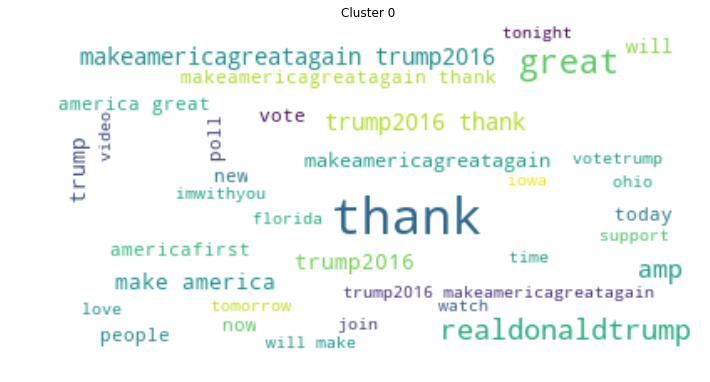

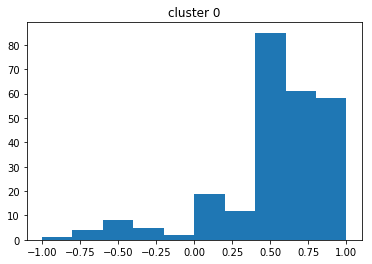

197


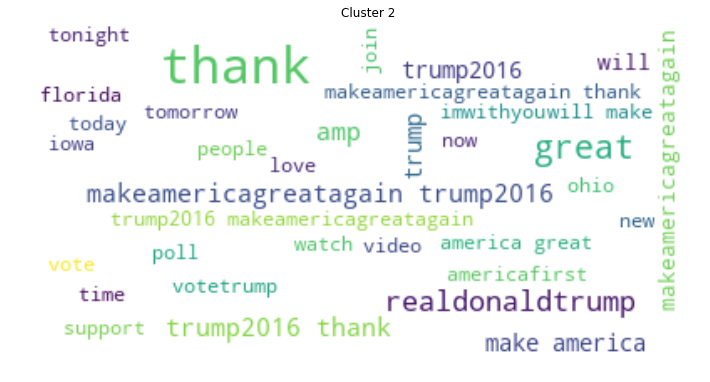

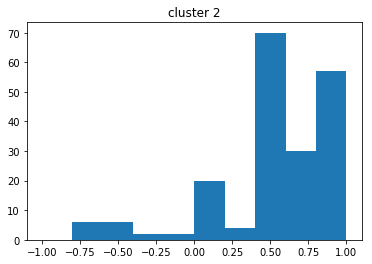

175


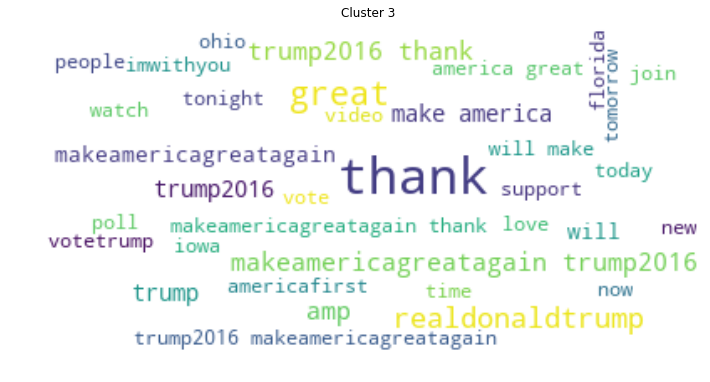

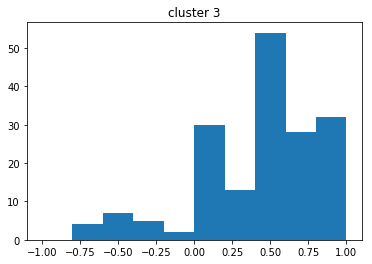

282


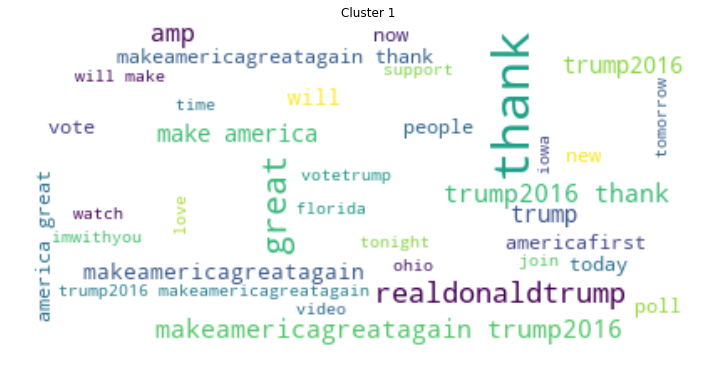

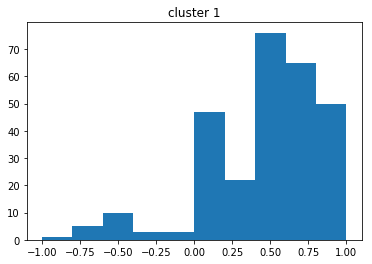

73


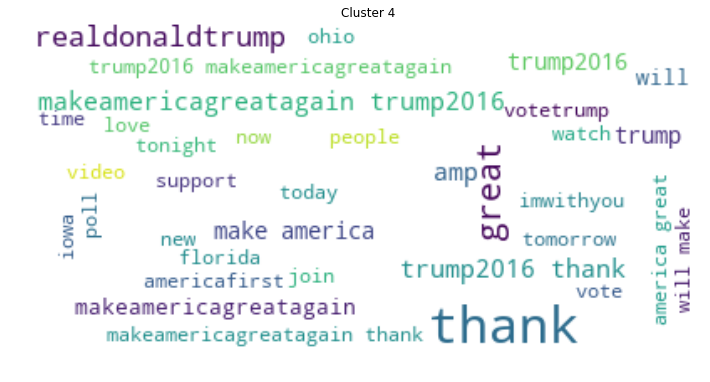

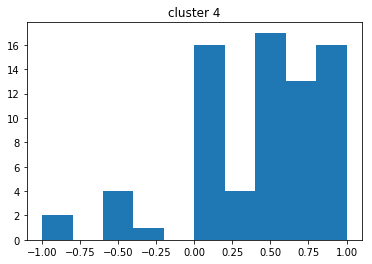

In [83]:
brc = Birch(branching_factor=20, n_clusters=5, threshold=0.3,compute_labels=True)
brc.fit(res1)
labels = brc.labels_
res1["labels"] = labels

for c in res1["labels"].unique():
    d = res1[res1["labels"] == c]
    print(len(d))
    text = res["noTags_punct"] 
    text = text.str.cat(sep=' ')
    wordcloud = WordCloud(max_font_size=30, max_words=35, background_color="white").generate(text)
    plt.figure(figsize=(12,10))    
    plt.title("Cluster " + str(c))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    
    plt.hist(d["vaderScore"],bins = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])
    plt.title("cluster " + str(c))
    plt.show()

In [84]:
g = res1.drop(['month', 'hour', 'week_year',"vaderScore"],axis=1)

for cluster in g["labels"].unique():
    g1 = g[g["labels"] == cluster]
    meanTf = []
    for column in g1.columns:
        if column != "labels":
            m = g1[column].mean()
            meanTf.append([column,m])
    
    meanTfOrdered = sorted(meanTf, key=itemgetter(1),reverse = True)
    print("cluster ",cluster," lunghezza ", len(g1), ":\n", str(meanTfOrdered[0:5]) + "\n")
    el = random.randint(g1.index[0],g1.index[len(g1)-1])
    el1 = random.randint(g1.index[0],g1.index[len(g1)-1])
    el2 = random.randint(g1.index[0],g1.index[len(g1)-1])
    print(res.iloc[el]["noTags_punct"] + "\n")
    print(res.iloc[el1]["noTags_punct"]+ "\n")
    print(res.iloc[el2]["noTags_punct"]+ "\n")

cluster  0  lunghezza  255 :
 [['makeamericagreatagain', 0.039932219083607765], ['maga', 0.03978720042167155], ['americafirst', 0.0373612020568114], ['america', 0.033112315965757595], ['get', 0.030631568216885396]]

unbelievable support in florida last night  thank you maga  

kridan1 canceled cable  sick of their bad coverage of you and the fawning over clinton  listened to your great speech on youtube

thank you michigan trump2016  

cluster  2  lunghezza  197 :
 [['makeamericagreatagain', 0.08910980917788476], ['new', 0.03380683551686983], ['america', 0.03225131632233472], ['love', 0.027622025732865933], ['vote', 0.023773463789375567]]

thank you america trump2016    

thank you south carolina together we will make america great again    

thank you   for the nice comments on foxnews today great job

cluster  3  lunghezza  175 :
 [['makeamericagreatagain', 0.13748352990746318], ['new', 0.0412427323467316], ['poll', 0.037074259451007965], ['america', 0.03561600304008195], ['iowa', 0.